## Homework_1
#### 011720209-陈航
##### 注：本程序前半部分并未调用modsim库内的run_euler函数，而是以欧拉法思想自己编写的相关函数；后半部分调用modsim库内的run_euler函数进行了验证。

In [15]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

定义单位与常数

In [16]:
m=UNITS.meter
s=UNITS.second
N=UNITS.newton
kg=UNITS.kilogram

dt=0.01*s
g=9.81*m/s**2
rho=1.225*kg/m**3
S=1.0*m**2
Cd=0.05
M=85.0*kg

85.0 <Unit('kilogram')>

定义计算自由落体部分的函数

In [17]:
def freefall(athl,tk):
    v=athl.v
    h=athl.h
    ts=linrange(0*s,tk*100,dt*100)
    frame=TimeFrame(columns=athl.init.index)
    frame.row[0]=v,h
    for t in ts:
        v=frame.row[t].v+g*dt
        h=frame.row[t].h-frame.row[t].v*dt
        frame1=TimeFrame([[v,h]],columns=athl.init.index)
        frame=frame.append(frame1,ignore_index=True)    
        if frame.row[t].h<0*m:
            print("运动员在自由落体阶段已着陆")
            break
    athl.t=tk
    athl.v=frame.row[t].v
    athl.h=frame.row[t].h
    return frame

定义计算有阻力部分的函数

In [18]:
def dragfall(athl,frame):
    v=athl.v
    h=athl.h
    t=athl.t
    while frame.row[round(t*100)].h>0*m:
        v=frame.row[round(t*100)].v+(M*g-0.5*rho*frame.row[round(t*100)].v**2*S*Cd)/M*dt
        h=frame.row[round(t*100)].h-frame.row[round(t*100)].v*dt
        frame1=TimeFrame([[v,h]],columns=athl.init.index)
        frame=frame.append(frame1,ignore_index=True)
        t+=dt
    return frame

定义总体调用函数

In [19]:
def run(athl,tk):
    results=freefall(athl,tk)
    results=dragfall(athl,results)
    return results

假设运动员位于5000米高空，
运动员开伞时间为1秒

In [20]:
init=State(v=0*m/s,h=5000*m)
athl=System(init=init,v=0*m/s,h=5000*m,t=0*s)
results=run(athl,1*s)
z=len(results)/100
results['t']=linrange(0*s,z*s,dt*s)

绘制时间-速度图

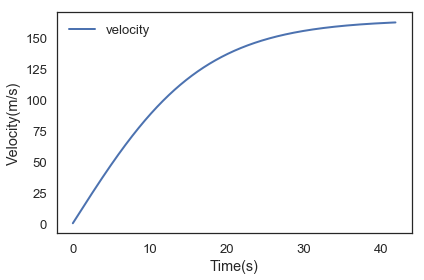

In [21]:
plot(results.t,results.v,label='velocity')
decorate(xlabel='Time(s)',ylabel='Velocity(m/s)')

绘制时间-高度图

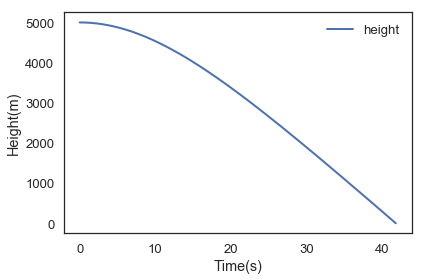

In [22]:
plot(results.t,results.h,label='height')
decorate(xlabel='Time(s)',ylabel='Height(m)')

改变开伞时间，
如运动员开伞时间为10秒

In [23]:
init=State(v=0*m/s,h=5000*m)
athl=System(init=init,v=0*m/s,h=5000*m,t=0*s)
results=run(athl,10*s)
z=len(results)/100
results['t']=linrange(0*s,z*s,dt*s)

绘制时间-速度图

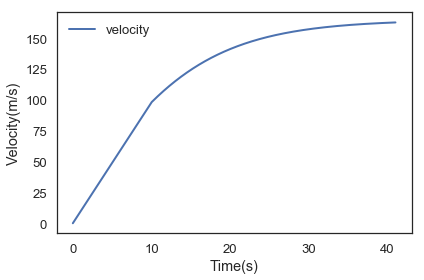

In [24]:
plot(results.t,results.v,label='velocity')
decorate(xlabel='Time(s)',ylabel='Velocity(m/s)')

绘制时间-高度图

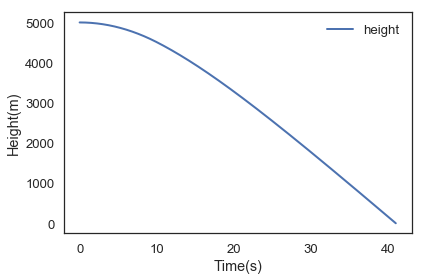

In [25]:
plot(results.t,results.h,label='height')
decorate(xlabel='Time(s)',ylabel='Height(m)')

改变开伞时间，
如运动员开伞时间为20秒

In [26]:
init=State(v=0*m/s,h=5000*m)
athl=System(init=init,v=0*m/s,h=5000*m,t=0*s)
results=run(athl,20*s)
z=len(results)/100
results['t']=linrange(0*s,z*s,dt*s)

绘制时间-速度图

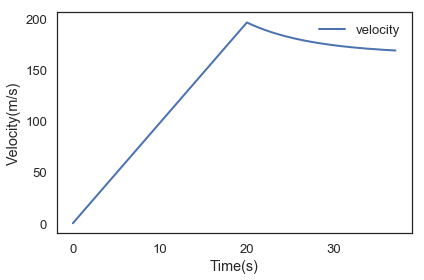

In [27]:
plot(results.t,results.v,label='velocity')
decorate(xlabel='Time(s)',ylabel='Velocity(m/s)')

绘制时间-高度图

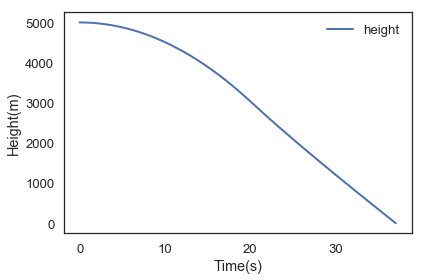

In [28]:
plot(results.t,results.h,label='height')
decorate(xlabel='Time(s)',ylabel='Height(m)')

以下为调用modsimk库内run_euler函数进行验证部分,设定20s后开伞

In [29]:
def accel(v,t):
    if t<tk:
        a=g
    else:
        a=(M*g-0.5*rho*v**2*S*Cd)/M
    return a

In [30]:
def slope_func(state,t,system):
    h,v=state
    dh=-v
    dv=accel(v,t)
    return dh,dv

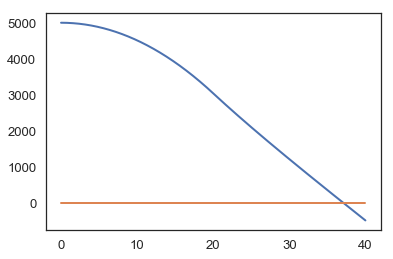

In [31]:
init=State(h=5000*m,v=0*m/s)
t_end=40*s
tk=20*s
athl=System(init=init,t_0=0*s,t_end=t_end,dt=dt)
results,details=run_euler(athl,slope_func)

plot(results.h)
x=[0,10,20,30,40]
y=[0,0,0,0,0]
plot(x,y)

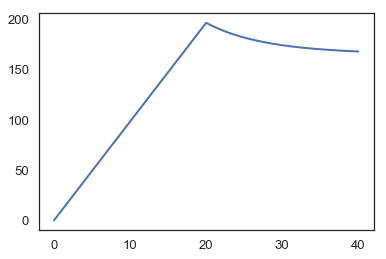

In [32]:
plot(results.v)